# Interaction graph construction example

### Initialization and data loading

Import handy libraries

In [1]:
from shapinteractions import ShapInteractions

import pickle

What you need:
- a 3-dimensional numpy array containing the SHAP interaction values as returned by *shap*'s `TreeExplainer` for example
- a 2-dimensional numpy array containing the feature values (the original data)
- a list containing the name of the features

In [2]:
with open('interactions.pickle', 'rb') as f:
    shap_interactions = pickle.load(f) # a 3-dimensional array containing the SHAP interaction values as returned by shap's TreeExplainer


with open('original_data.pickle', 'rb') as f:
    feature_values, feature_names = pickle.load(f) # a 2-dimensional array containing the feature values and a list containing the feature names

Create the `ShapInteraction` object

In [16]:
interactions = ShapInteractions(
    shap_interactions=shap_interactions,
    feature_values=feature_values,
    feature_names=feature_names,
    compute_correlations=False # change this to True to compute correlation coefficients as part of the initialization process
)

### Interaction graph construction

It not done during class initialization, compute correlation coefficients

In [13]:
interactions.compute_trend_coefs()

Computing Pearson's and Spearman's correlation coefficients... This may take time for large datasets. If found, NaNs will be ignored.


/home/fefurger/anaconda3/envs/felix/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/fefurger/anaconda3/envs/felix/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Build the graph, which will be saved into an HTML file, and open the file in a web browser

In [15]:
interactions.create_graph(filename='interaction_graph.html', spearmans_threshold=0.3)

### How to read the graph?

Each **feature** is represented by a **node**:
- its color informs about whether the feature is positively correlated (red) or negatively correlated (blue) with the model predictions
- its size relates to the average absolute SHAP value of the feature's main effect (the contribution of the feature alone, without accounting for its interactions)

Each **interaction** is represented by an **arrow**:
- its color informs about whether the interaction reinforces (red) or attenuates (blue) the main effect of the pointed feature (regardless of that feature's color)
- the top slider allows you to hide/reveal interactions based on their strength (average absolute SHAP interaction value)

A node/arrow is rendered black if its Spearman's and Pearson's coefficients are of opposite signs, suggesting that the relationship is more complex than it appears. Similarly, if Spearman's coefficient for a given interaction is smaller than `spearmans_threshold` (default value of 0.3), the arrow is rendered dashed, suggesting that the correlation is weak.

You can hover over a node/arrow to display the corresponding correlation coefficients and average absolute SHAP value.
_____________________________________________________________________________

______________________________________________________
### Average SHAP interaction values overview

In addition to the graph, you can have an overview of your interactions using heatmaps in terms of average SHAP values. Three modes are available:
- 'avg': displays the average SHAP interaction values (symmetrical matrix)
- 'avg_abs': displays the average absolute SHAP interaction values (symmetrical matrix)
- 'pos_neg': displays the average negative interaction SHAP values in the upper right corner and the average positive interaction SHAP values in the lower left corner


If necessary, `empty_diag` can be set to `True` to remove main effects for the visualization and give more color weight to the interactions.

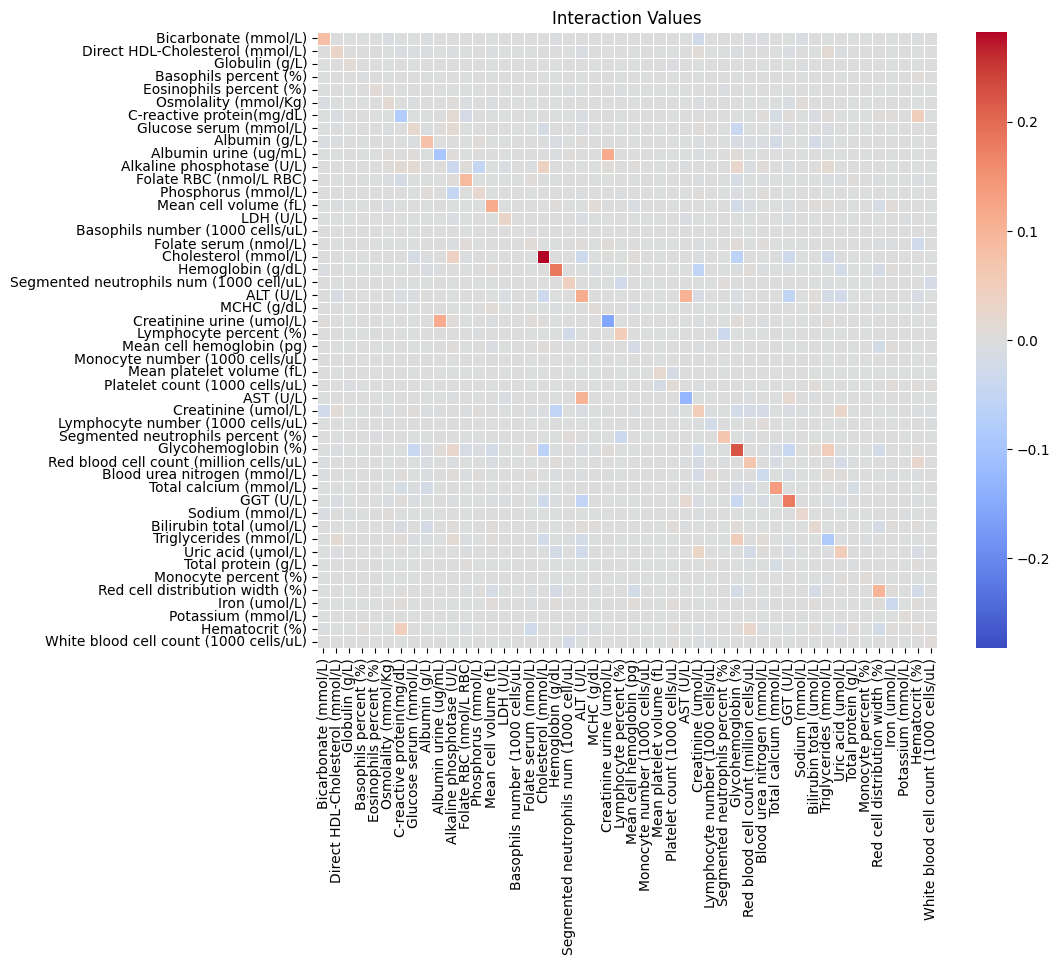

In [9]:
_ = interactions.get_interaction_matrix(mode='avg', empty_diag=False)

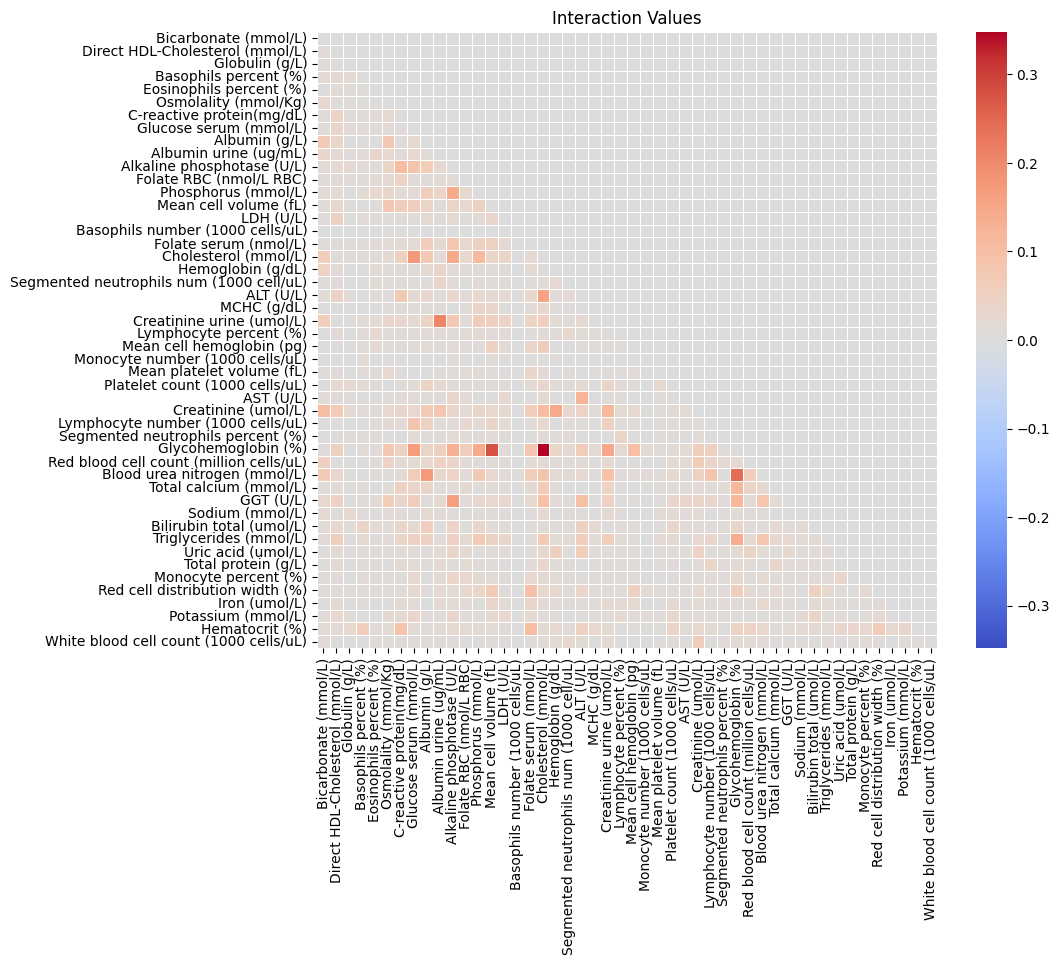

In [12]:
_ = interactions.get_interaction_matrix(mode='avg_abs', empty_diag=True, empty_top=True)

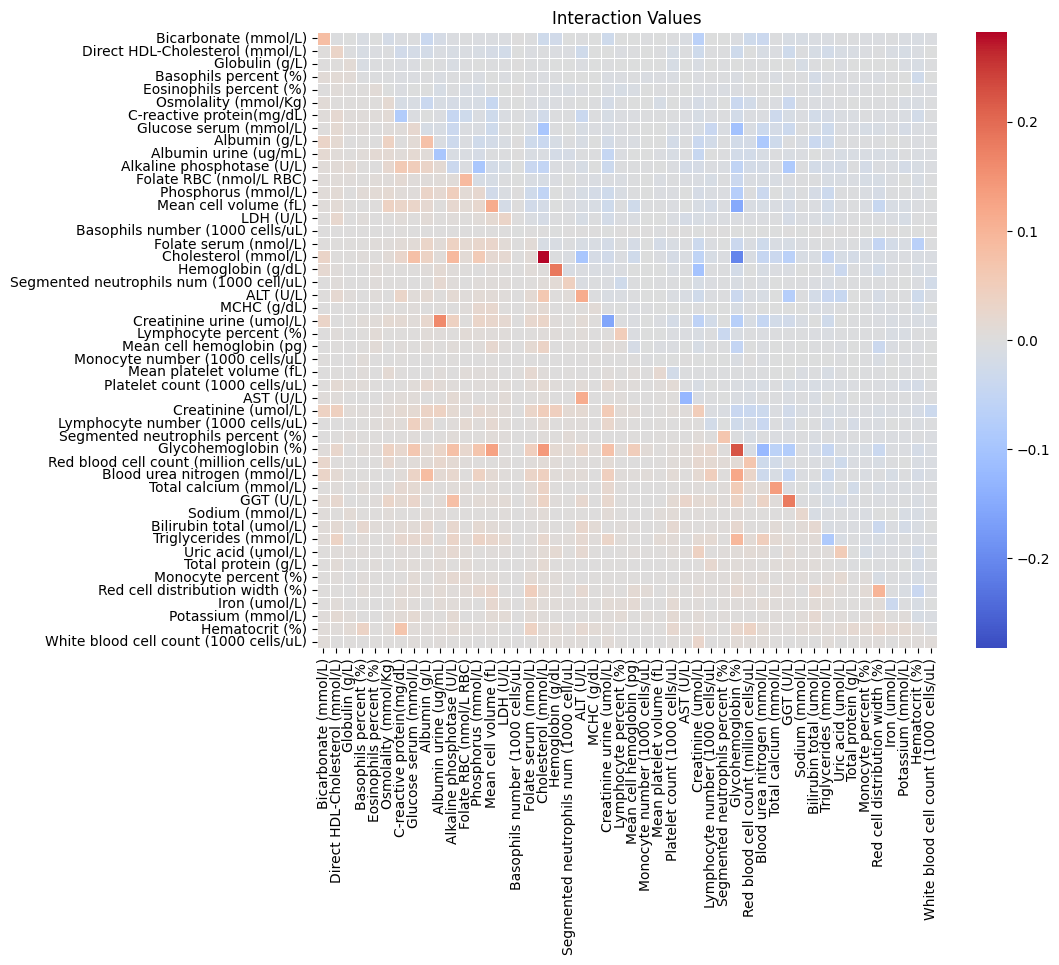

In [6]:
_ = interactions.get_interaction_matrix(mode='pos_neg', empty_diag=False)